# IMPORTING NECESSEARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, train_test_split


In [2]:
df= pd.read_excel("/Users/hanishka_kela/Documents/Healthcare_Premium_Prediction_(Regression)/Data_resources/premiums_young.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [3]:
df.shape

(20096, 13)

# DATA CLEANING


In [4]:
df.columns=df.columns.str.replace(' ','_').str.lower()

In [5]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [6]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

# HANDLE NA VALUES

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

# CHECKING FOR DUPLICATES

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267
std,2.294052,0.940713,23.420493,2749.906347
min,18.000000,-3.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


In [11]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1])

In [12]:
df['number_of_dependants']=abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

In [13]:
numeric_coloumns = df.select_dtypes(include='number').columns
numeric_coloumns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

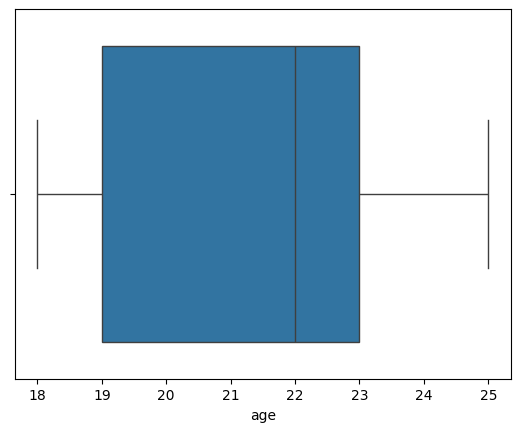

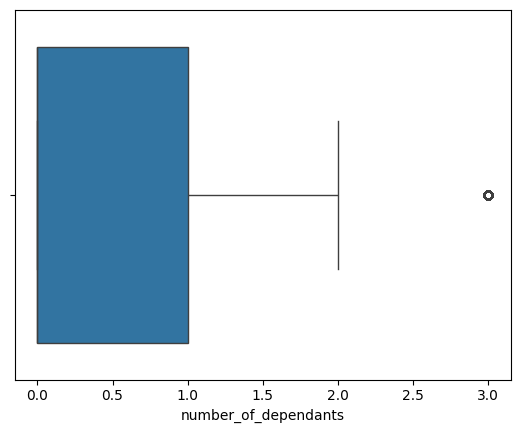

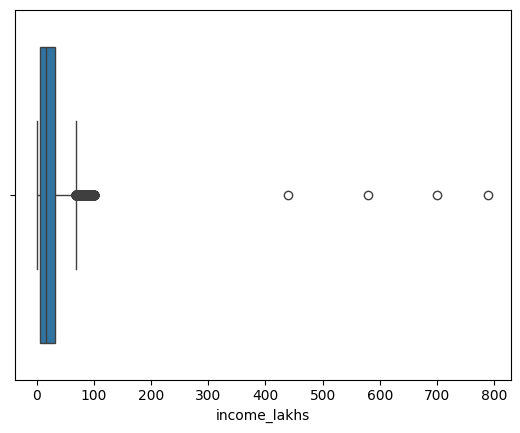

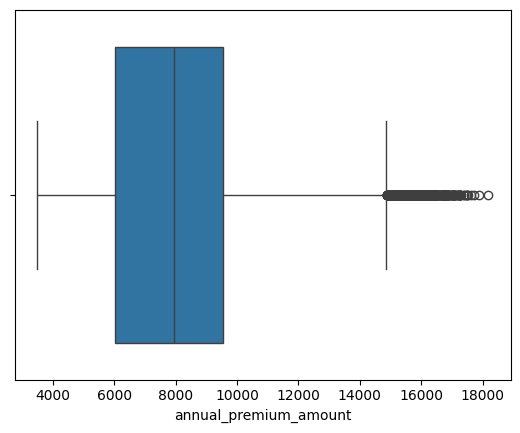

In [14]:
for col in numeric_coloumns:
    sns.boxplot(x=df[col])
    plt.show()

In [15]:
df[df.age>100]['age'].unique()

array([], dtype=int64)

In [16]:
df1=df[df.age<=100].copy()
df1.describe()


,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267
std,2.294052,0.937200,23.420493,2749.906347
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


In [17]:
def get_iqr_bounds(col):
    Q1, Q3=col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound , upper_bound

get_iqr_bounds(df1.income_lakhs)


(-31.5, 68.5)

In [18]:
qunatile_threshold= df1.income_lakhs.quantile(0.999)
qunatile_threshold

np.float64(100.0)

In [19]:
df2 = df1[df1.income_lakhs<=qunatile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263
std,2.294248,0.937238,21.732062,2749.912486
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.000000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,100.000000,18186.000000


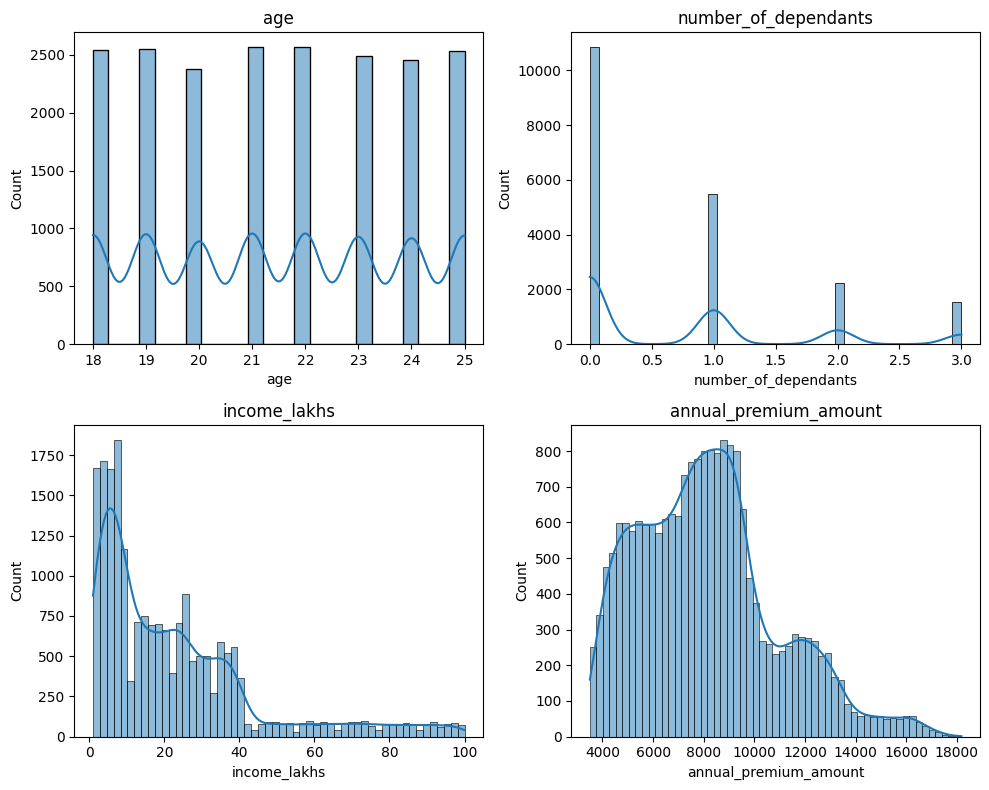

In [20]:
fig, axs=plt.subplots(nrows=2,ncols=2,figsize=(10,8))

for i,col in enumerate(numeric_coloumns):
    ax=axs[i//2,i%2]
    sns.histplot(df2[col],kde=True,ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

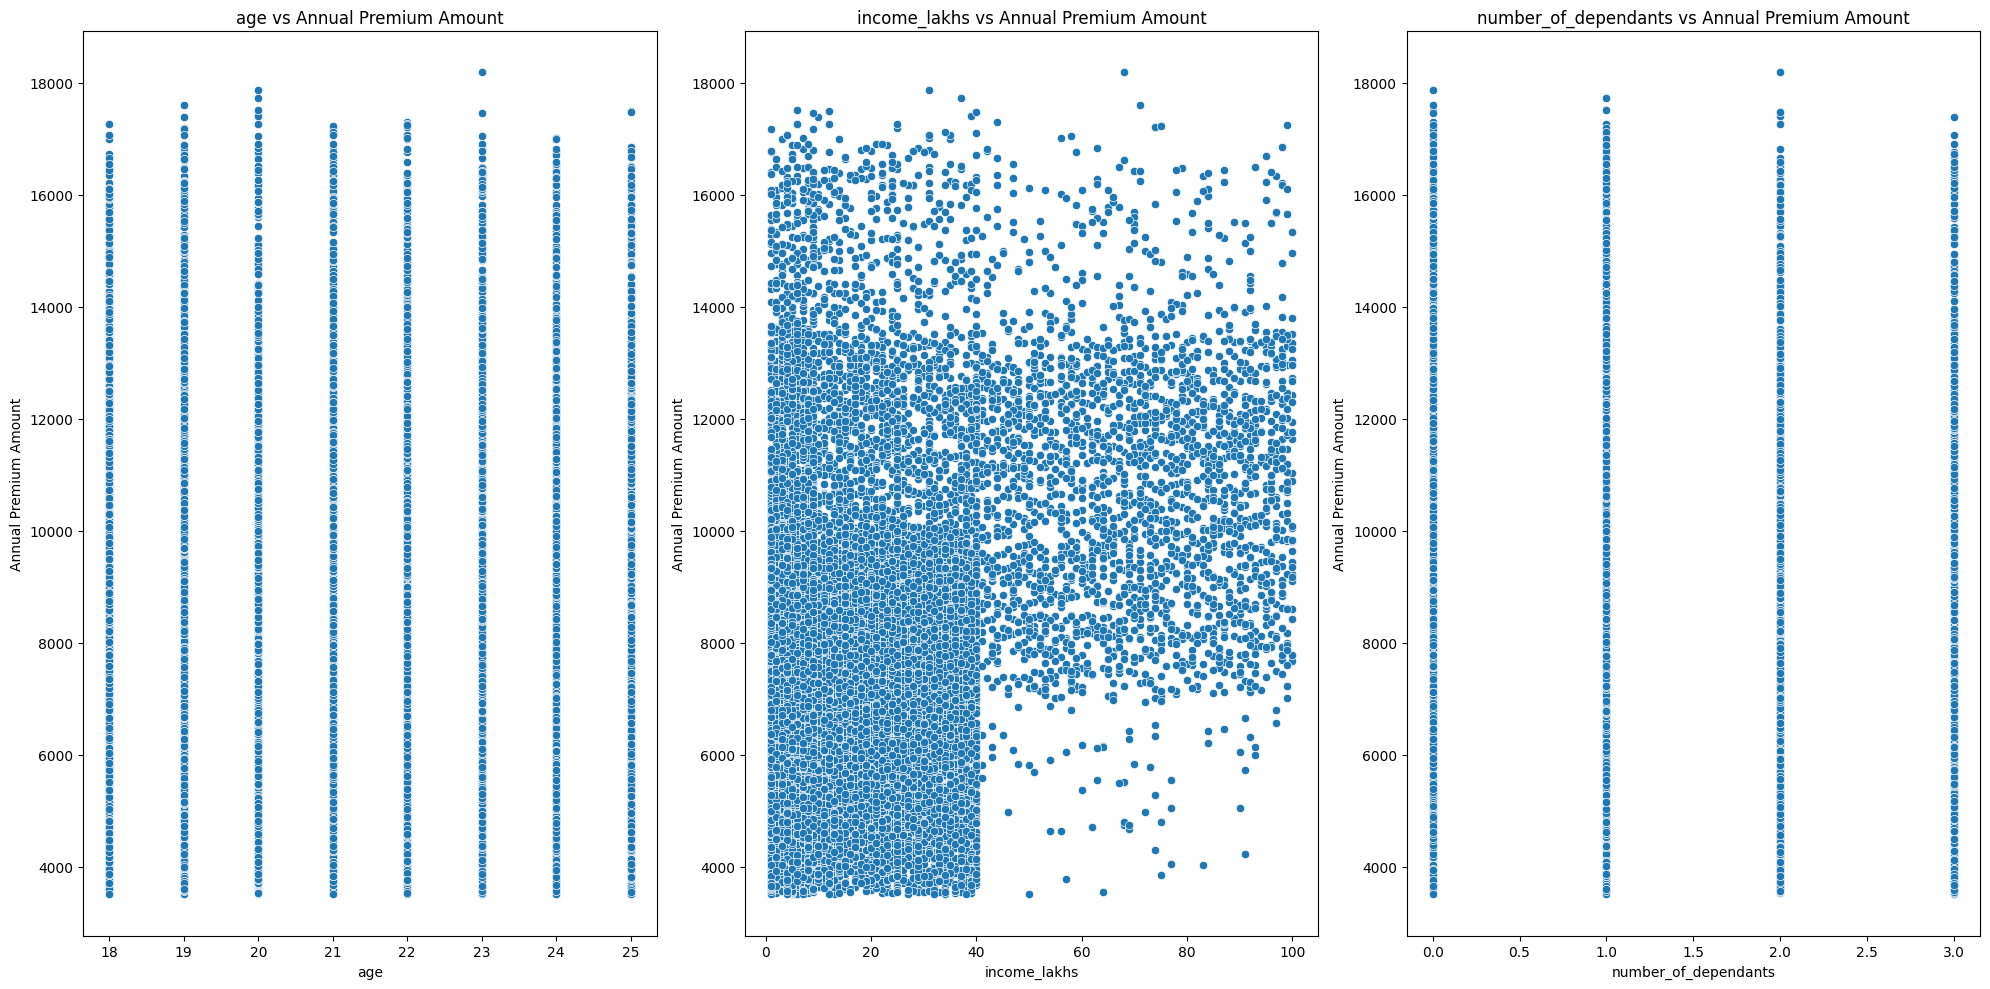

In [21]:
numeric_features=['age','income_lakhs','number_of_dependants']

fig,axes=plt.subplots(1,len(numeric_features),figsize=(20,10))
for ax, col in zip(axes, numeric_features):
    sns.scatterplot(x=df2[col],y=df2['annual_premium_amount'],ax=ax)
    ax.set_title(f'{col} vs Annual Premium Amount')
    ax.set_xlabel(col)
    ax.set_ylabel("Annual Premium Amount")

plt.tight_layout()
plt.show()

In [22]:
categorical_cols=df.select_dtypes(include=['object', 'category', 'bool']).columns
categorical_cols

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [23]:
for col in categorical_cols:
    print(col,' : ',df2[col].unique() )

gender  :  ['Male' 'Female']
region  :  ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status  :  ['Unmarried' 'Married']
bmi_category  :  ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status  :  ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status  :  ['Self-Employed' 'Freelancer' 'Salaried']
income_level  :  ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history  :  ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan  :  ['Silver' 'Bronze' 'Gold']


In [24]:
df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke' : 'No Smoking',
    'Not Smoking':'No Smoking'
},inplace=True)

df2['smoking_status'].unique()

/var/folders/r_/zhk06phn5rg0kd9cv4qb47140000gn/T/ipykernel_42807/691254365.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [25]:
pct_count=df2['gender'].value_counts(normalize=True)

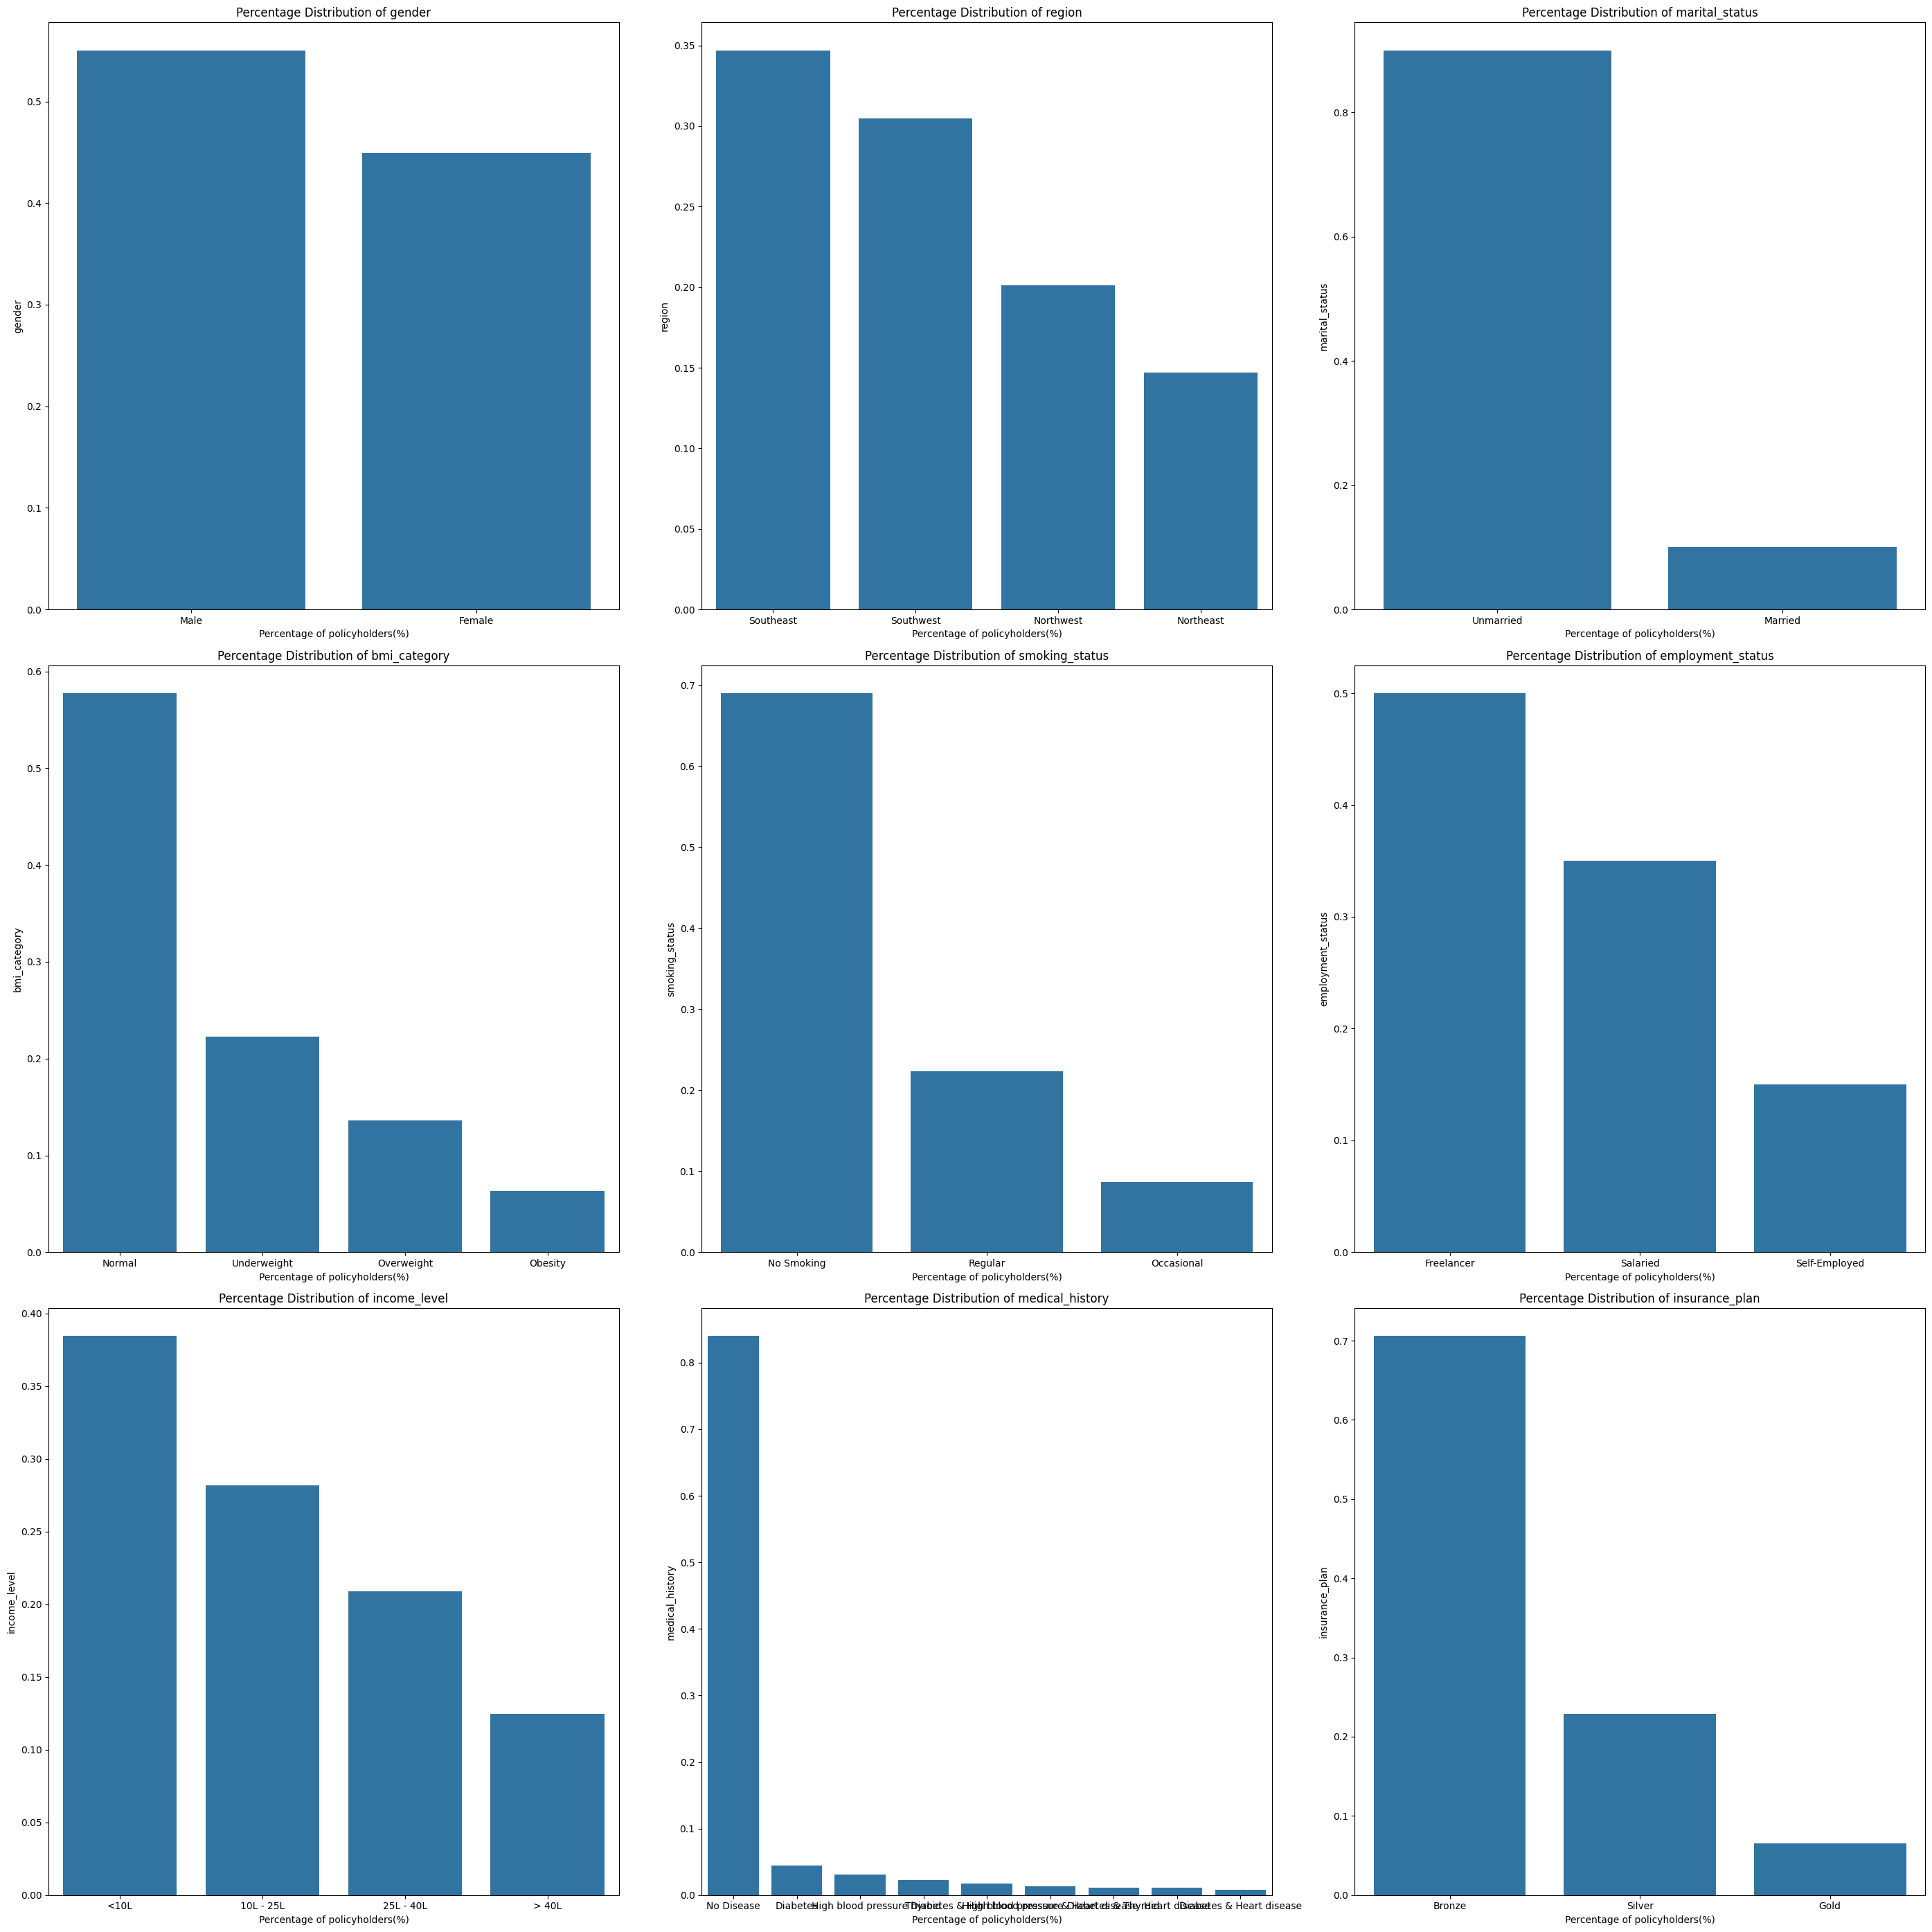

In [26]:
fig, axes=plt.subplots(3,3,figsize=(28,28))
axes=axes.flatten()
for ax, col in zip(axes, categorical_cols):
    category_counts=df2[col].value_counts(normalize=True)
    sns.barplot(x=category_counts.index,y=category_counts.values,ax=ax)
    ax.set_title(f'Percentage Distribution of {col}')
    ax.set_xlabel("Percentage of policyholders(%)")
    ax.set_ylabel(col)
plt.tight_layout()
plt.show()    

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


<Axes: xlabel='income_level'>

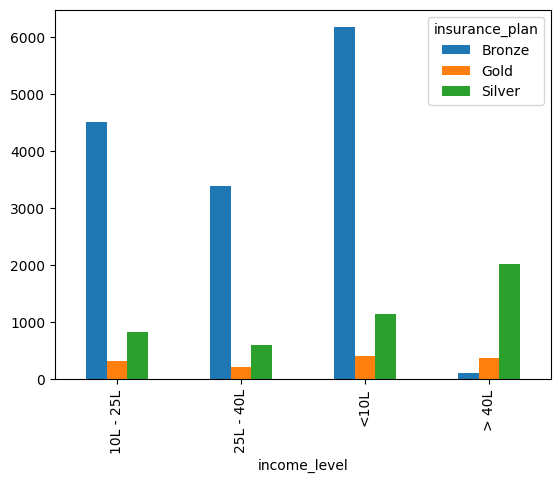

In [27]:
crosstab=pd.crosstab(df2['income_level'],df2['insurance_plan'])
print(crosstab)
crosstab.plot(kind='bar')

<Axes: xlabel='insurance_plan', ylabel='income_level'>

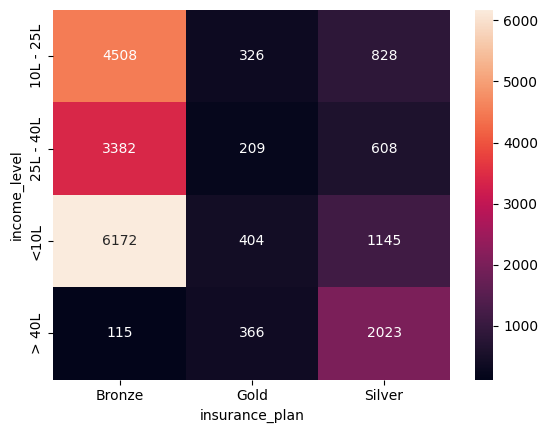

In [28]:
sns.heatmap(crosstab,annot=True,fmt='d')

# FEATURE ENGINEERING 

In [29]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [30]:
risk_scores={
    'diabetes':6,
    'heart disease':8,
    'high blood pressure':6,
    'thyroid':5,
    'no disease':0,
    'none':0
}

df2[['disease1','disease2']]= df2['medical_history'].str.split(' & ',expand =True).apply(lambda x:x.str.lower())
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,None


In [31]:
df2['disease1'].fillna('none',inplace=True)
df2['disease2'].fillna('none',inplace=True)
df2['total_risk_score']=0

for disease in['disease1','disease2']:
    df2['total_risk_score']+=df2[disease].map(risk_scores)

max_score=df2['total_risk_score'].max()
min_score=df2['total_risk_score'].min()
df2['normalized_risk_score']=(df2['total_risk_score']-min_score)/(max_score-min_score)
df2.head()

/var/folders/r_/zhk06phn5rg0kd9cv4qb47140000gn/T/ipykernel_42807/308706082.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none',inplace=True)
/var/folders/r_/zhk06phn5rg0kd9cv4qb47140000gn/T/ipykernel_42807/308706082.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,none,0,0.000000


In [32]:
df2.sample(15)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
180,24,Male,Southwest,Unmarried,0,Normal,Regular,Self-Employed,> 40L,52,No Disease,Silver,8943,no disease,none,0,0.0
3354,19,Female,Northeast,Unmarried,0,Underweight,Regular,Freelancer,<10L,2,Diabetes & Heart disease,Bronze,7784,diabetes,heart disease,14,1.0
18921,18,Male,Northwest,Unmarried,0,Normal,Regular,Salaried,25L - 40L,31,No Disease,Bronze,6582,no disease,none,0,0.0
18665,19,Female,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,5,No Disease,Bronze,8723,no disease,none,0,0.0
3689,22,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,<10L,4,No Disease,Gold,15894,no disease,none,0,0.0
17902,25,Male,Northwest,Unmarried,0,Normal,No Smoking,Self-Employed,<10L,1,No Disease,Bronze,7305,no disease,none,0,0.0
9676,25,Male,Northeast,Unmarried,0,Underweight,No Smoking,Freelancer,25L - 40L,38,No Disease,Bronze,8103,no disease,none,0,0.0
742,22,Male,Southwest,Unmarried,1,Underweight,No Smoking,Freelancer,25L - 40L,35,No Disease,Bronze,4945,no disease,none,0,0.0
1293,23,Male,Southeast,Unmarried,0,Normal,No Smoking,Salaried,<10L,9,No Disease,Bronze,7529,no disease,none,0,0.0
8046,18,Female,Southeast,Unmarried,1,Normal,No Smoking,Freelancer,<10L,8,No Disease,Bronze,3735,no disease,none,0,0.0


In [33]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [34]:
df2['insurance_plan']=df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
df2.insurance_plan.unique()


array([2, 1, 3])

In [35]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [36]:
df2['income_level'] = df2['income_level'].replace({
    '<10L': 1,
    '10L - 25L': 2,
    '25L - 40L': 3,
    '> 40L': 4
})


/var/folders/r_/zhk06phn5rg0kd9cv4qb47140000gn/T/ipykernel_42807/3591113900.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['income_level'] = df2['income_level'].replace({


In [37]:
nominal_cols = [
    'gender',
    'region',
    'marital_status',
    'bmi_category',
    'smoking_status',
    'employment_status',
]

df3 = pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int)

df4=df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


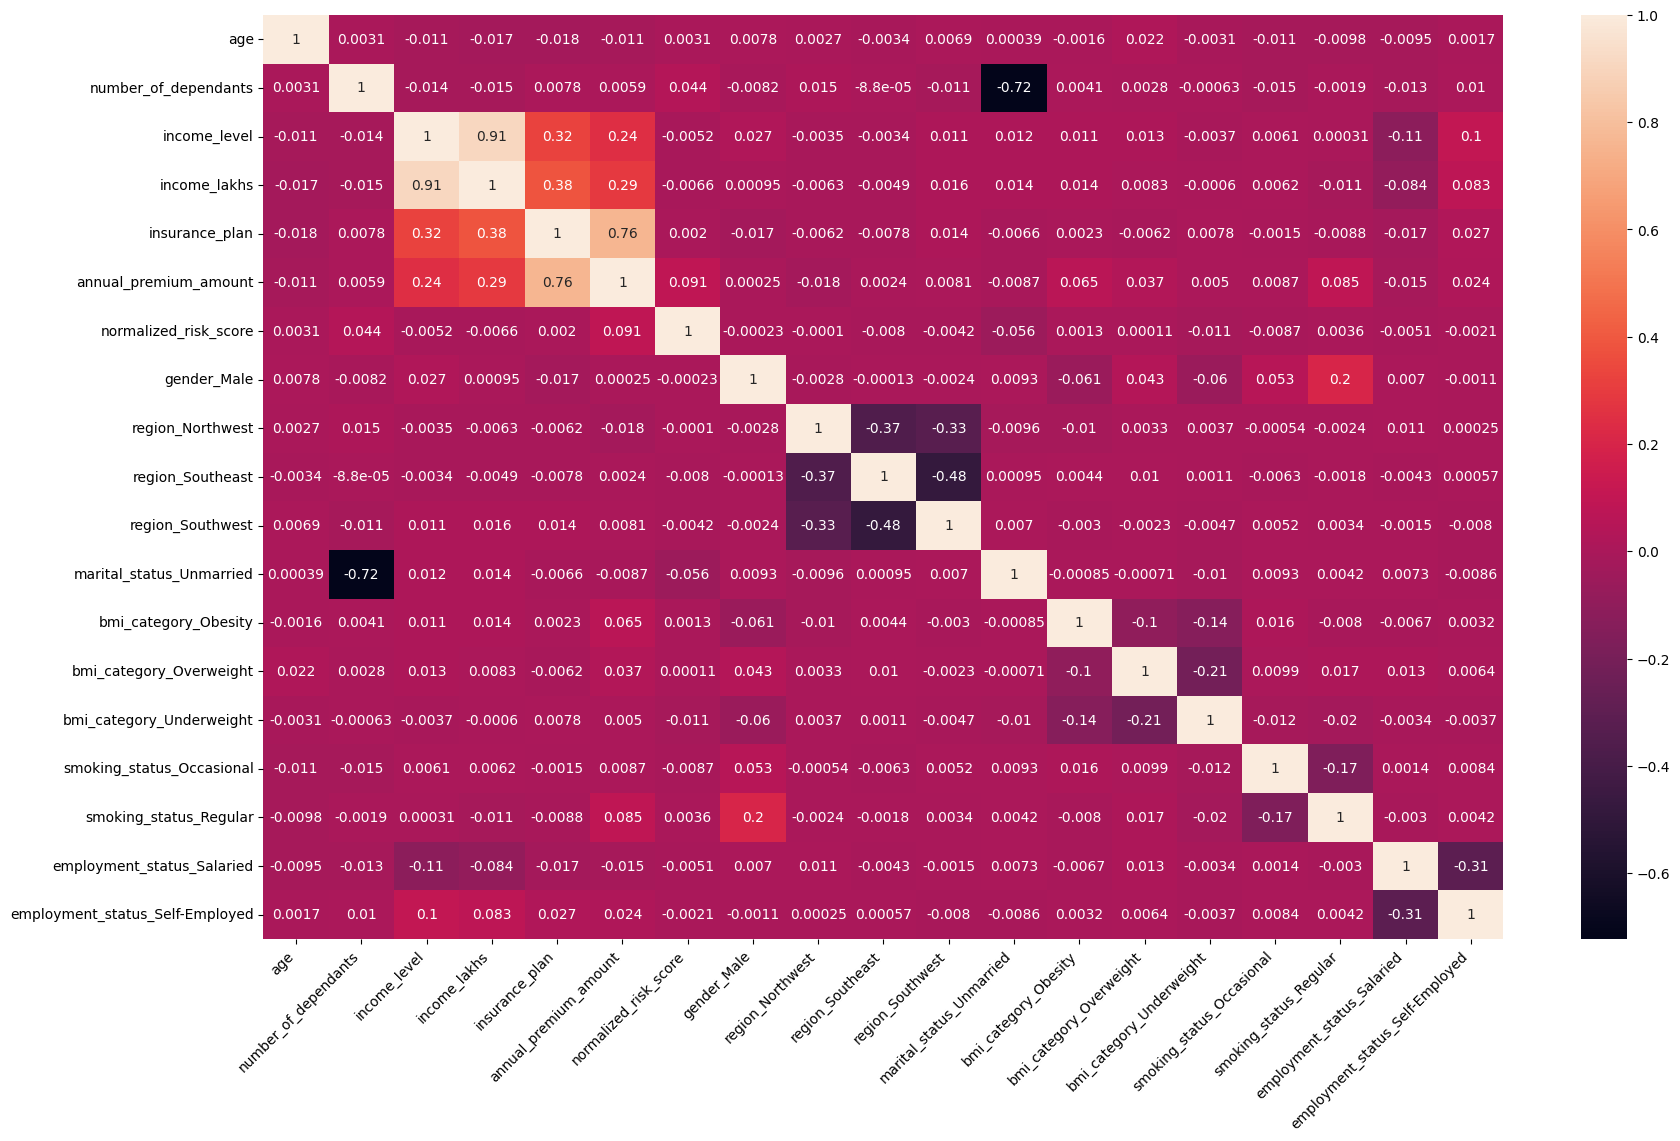

In [38]:
cm=df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.show()

In [39]:
df4.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,0.000000,0,1,0,0,1,0,0,1,0,0,0,0


In [40]:
print(df4.dtypes)


age                                  int64
number_of_dependants                 int64
income_level                         int64
income_lakhs                         int64
insurance_plan                       int64
annual_premium_amount                int64
normalized_risk_score              float64
gender_Male                          int64
region_Northwest                     int64
region_Southeast                     int64
region_Southwest                     int64
marital_status_Unmarried             int64
bmi_category_Obesity                 int64
bmi_category_Overweight              int64
bmi_category_Underweight             int64
smoking_status_Occasional            int64
smoking_status_Regular               int64
employment_status_Salaried           int64
employment_status_Self-Employed      int64
dtype: object


In [41]:
df4 = df4.copy()
df4 = df4.apply(pd.to_numeric, errors='coerce')

In [42]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs','insurance_plan']

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.head()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,1.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.000000,0.020202,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,1.000000,0.969697,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.333333,0.141414,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.333333,0.131313,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [43]:
def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['columns']=data.columns
    vif_df['VIF']=[variance_inflation_factor(data.values,i)for i in range(data.shape[1])]
    return vif_df

calculate_vif(X)

,columns,VIF
0,age,3.142881
1,number_of_dependants,1.860761
2,income_level,11.928707
3,income_lakhs,11.874242
4,insurance_plan,1.592892
5,normalized_risk_score,1.154223
6,gender_Male,2.310023
7,region_Northwest,2.147701
8,region_Southeast,2.970188
9,region_Southwest,2.730503


In [44]:
calculate_vif(X.drop('income_level',axis='columns'))

,columns,VIF
0,age,3.141534
1,number_of_dependants,1.858110
2,income_lakhs,2.291873
3,insurance_plan,1.587794
4,normalized_risk_score,1.154174
5,gender_Male,2.299848
6,region_Northwest,2.146767
7,region_Southeast,2.968993
8,region_Southwest,2.729813
9,marital_status_Unmarried,7.299818


In [45]:
X_reduced=X.drop('income_level',axis='columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


# MODEL TRAINING 

In [46]:
X_train, X_test, y_train , y_test=train_test_split(X_reduced,y,test_size=0.3,random_state=10)

In [47]:
model_LR=LinearRegression()
model_LR.fit(X_train,y_train)
test_score = model_LR.score(X_test,y_test)
train_score = model_LR.score(X_train,y_train)
print(f'Train Score :{train_score}')
print(f'Test Score :{test_score}')

Train Score :0.6020471274164894
Test Score :0.6047589163893645


In [48]:
y_pred =model_LR.predict(X_test)
mse_lr=mean_squared_error(y_test,y_pred)
rmse_lr=np.sqrt(mse_lr)

print("Linear Regression ==> :",mse_lr,"\nrmse:",rmse_lr)

Linear Regression ==> : 3005669.8791236714 
rmse: 1733.6867880686152


In [49]:
X_test.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12774,1.0,0.666667,0.040404,0.0,0.0,1,0,0,1,1,0,0,1,0,0,0,0


In [50]:
model_LR.intercept_

np.float64(6614.58339123075)

In [51]:
model_LR.coef_ #how much they contribute to the model

array([ 5.51905147e+01, -1.45039643e+02, -3.60667677e+01,  7.00007042e+03,
        1.11127879e+03,  9.82564766e+00, -1.14273450e+02, -3.64663714e+01,
       -6.72232248e+01, -5.85343424e+01,  7.92952660e+02,  4.35760406e+02,
        1.69728916e+02,  2.44813937e+02,  6.19082947e+02, -1.30535485e+01,
       -4.34272200e+00])

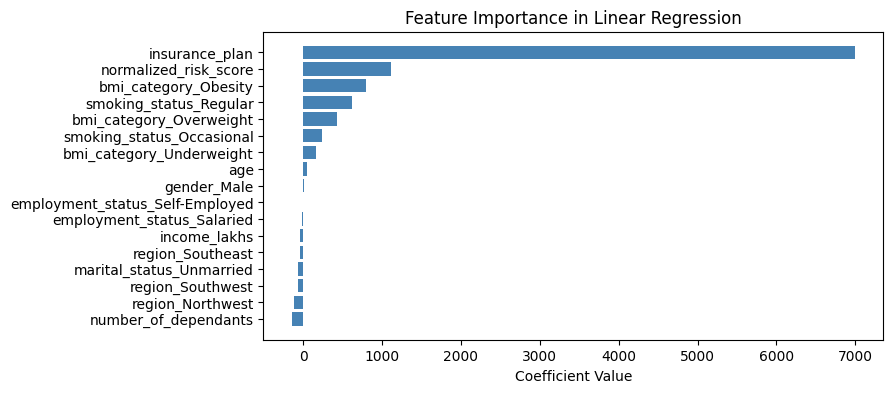

In [52]:
feature_importances = model_LR.coef_

coef_df= pd.DataFrame(feature_importances, index= X_test.columns,columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients',ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color = 'steelblue')
plt.xlabel("Coefficient Value")
plt.title('Feature Importance in Linear Regression')
plt.show()

In [53]:
model_rg=Ridge()
model_rg.fit(X_train,y_train)
test_score = model_rg.score(X_test,y_test)
train_score = model_rg.score(X_train,y_train)
print(f'Train Score :{train_score}')
print(f'Test Score :{test_score}')

Train Score :0.6020466631305188
Test Score :0.6047715291063814


In [54]:
from xgboost import XGBRegressor
model_xg=XGBRegressor()
model_xg.fit(X_train,y_train)
test_score = model_xg.score(X_test,y_test)
train_score = model_xg.score(X_train,y_train)
print(f'Train Score :{train_score}')
print(f'Test Score :{test_score}')

Train Score :0.7251046895980835
Test Score :0.5638787746429443


In [55]:
y_pred =model_xg.predict(X_test)
mse_lr=mean_squared_error(y_test,y_pred)
rmse_lr=np.sqrt(mse_lr)

print("XGBoost Regression ==> :",mse_lr,"\nrmse:",rmse_lr)

XGBoost Regression ==> : 3316549.0 
rmse: 1821.1394784584731


In [56]:
param_grid={
    'n_estimators':[20,40,50],
    'learning_rate' : [0.01,0,.1,0.2],
    'max_depth': [3,4,5]
}

random_search= RandomizedSearchCV(model_xg,param_grid,n_iter=10,cv=3,scoring='r2',random_state=10)
random_search.fit(X_train,y_train)
random_search.best_score_

np.float64(0.5966076254844666)

In [57]:
random_search.best_params_

{'n_estimators': 40, 'max_depth': 4, 'learning_rate': 0.2}

In [58]:
best_model = random_search.best_estimator_

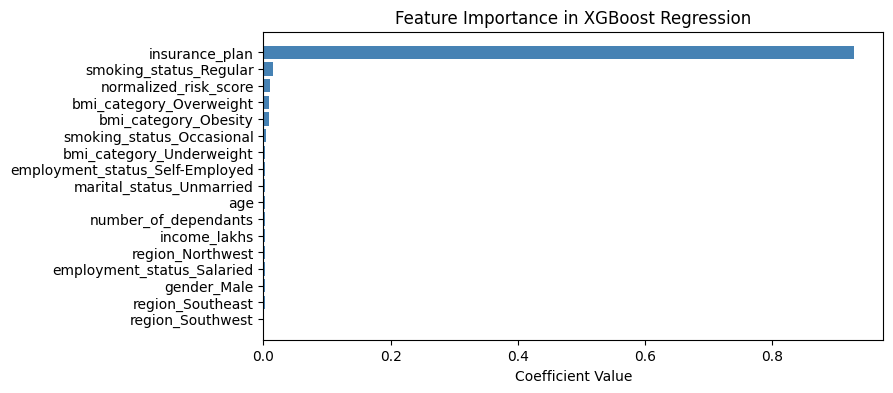

In [59]:
feature_importances = best_model.feature_importances_

coef_df= pd.DataFrame(feature_importances, index= X_test.columns,columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients',ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color = 'steelblue')
plt.xlabel("Coefficient Value")
plt.title('Feature Importance in XGBoost Regression')
plt.show()

### ERROR ANALYSIS

In [60]:
y_pred=best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test


results_df=pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred,
    'diff':residuals,
    'diff_pct': residuals_pct
})

results_df

,actual,predicted,diff,diff_pct
12774,6238,6630.815430,392.815430,6.297137
14758,9462,7027.521973,-2434.478027,-25.729001
13205,5152,6927.460938,1775.460938,34.461587
14278,6988,8219.156250,1231.156250,17.618149
19351,4917,6698.568359,1781.568359,36.232832
...,...,...,...,...
17652,7635,6528.431152,-1106.568848,-14.493371
5807,4845,7009.198730,2164.198730,44.668704
10298,13866,11147.436523,-2718.563477,-19.605968
13316,5255,6727.642578,1472.642578,28.023646


<Axes: xlabel='diff_pct', ylabel='Count'>

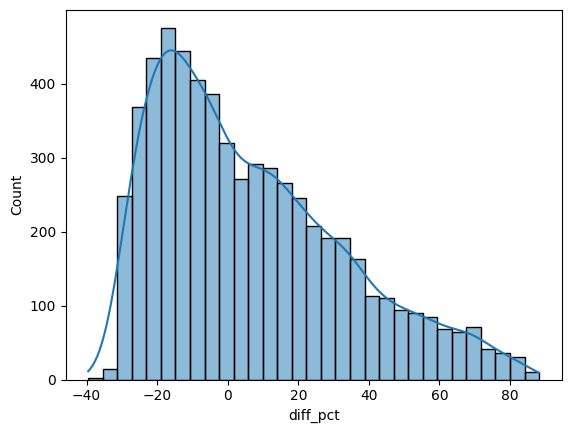

In [61]:
sns.histplot(results_df['diff_pct'],kde=True)

In [62]:
extreme_error_threshold=10

extreme_results_df=results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]
extreme_results_df.shape

(4419, 4)

In [63]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

73.33222701626286

In [64]:
results_df[np.abs(results_df.diff_pct)>50].sort_values(by='diff_pct',ascending=False)


,actual,predicted,diff,diff_pct
17084,3562,6706.084473,3144.084473,88.267391
17205,3629,6814.242676,3185.242676,87.771912
16580,3538,6593.905762,3055.905762,86.373820
10288,3623,6733.551270,3110.551270,85.855680
15055,3684,6832.855957,3148.855957,85.473832
...,...,...,...,...
14024,4415,6629.097168,2214.097168,50.149426
10382,4620,6935.218750,2315.218750,50.112960
9356,5198,7801.434082,2603.434082,50.085304
405,4659,6989.403320,2330.403320,50.019389


In [65]:
X_test.index

Index([12774, 14758, 13205, 14278, 19351, 10622, 16391, 14799, 17184, 16348,
       ...
        8695,  9658, 14195,  1365,   399, 17652,  5807, 10298, 13316,  2583],
      dtype='int64', length=6026)

In [66]:
extreme_results_df.index

Index([14758, 13205, 14278, 19351, 10622, 14799, 16348,  5573,  5634, 14882,
       ...
        5484,  8988,  8695,  9658,  1365,   399, 17652,  5807, 10298, 13316],
      dtype='int64', length=4419)

In [67]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
14758,0.285714,0.000000,0.060606,0.0,0.000000,0,0,0,1,1,0,0,0,0,1,0,1
13205,0.714286,0.333333,0.141414,0.0,0.000000,1,1,0,0,1,0,0,0,0,1,0,1
14278,0.714286,0.333333,0.222222,0.0,0.000000,1,0,1,0,1,1,0,0,0,1,0,0
19351,0.571429,0.000000,0.101010,0.0,0.000000,1,0,0,1,1,0,0,1,0,0,0,0
10622,0.428571,0.333333,0.050505,0.0,0.357143,0,0,1,0,1,0,1,0,0,0,0,0


In [68]:
print(X_test.columns.tolist())


['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan', 'normalized_risk_score', 'gender_Male', 'region_Northwest', 'region_Southeast', 'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity', 'bmi_category_Overweight', 'bmi_category_Underweight', 'smoking_status_Occasional', 'smoking_status_Regular', 'employment_status_Salaried', 'employment_status_Self-Employed']


Skipping missing feature: income_level


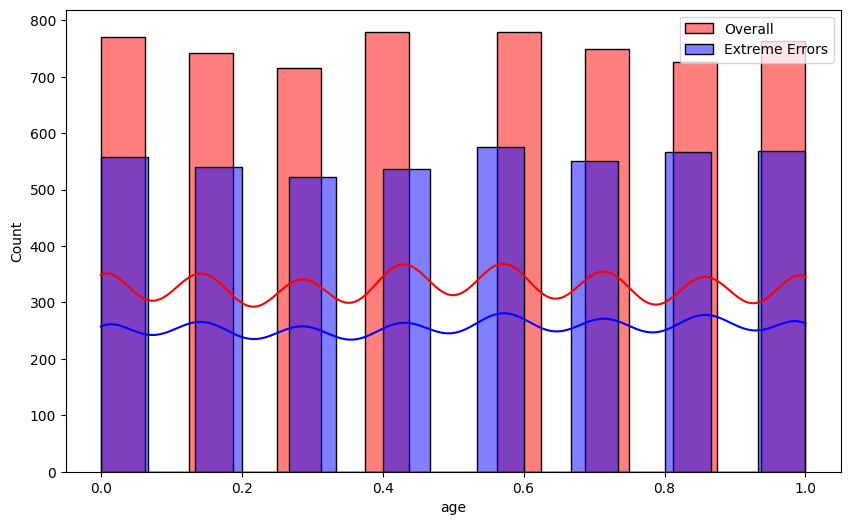

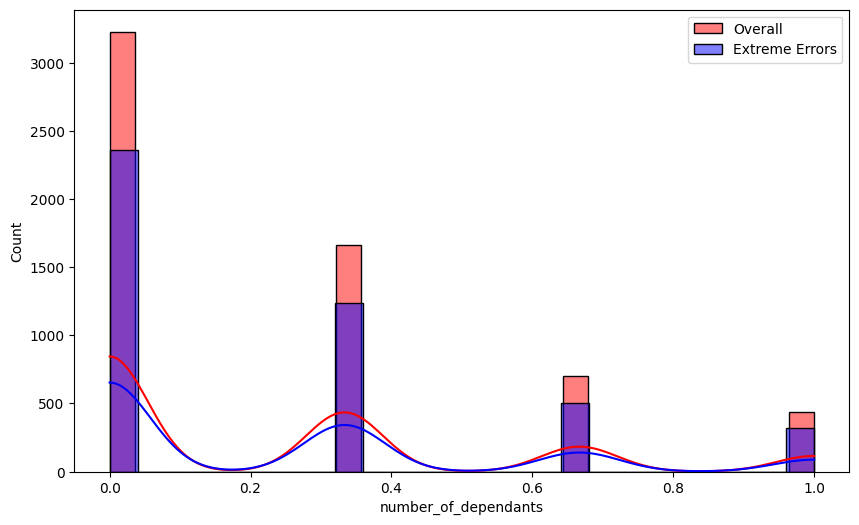

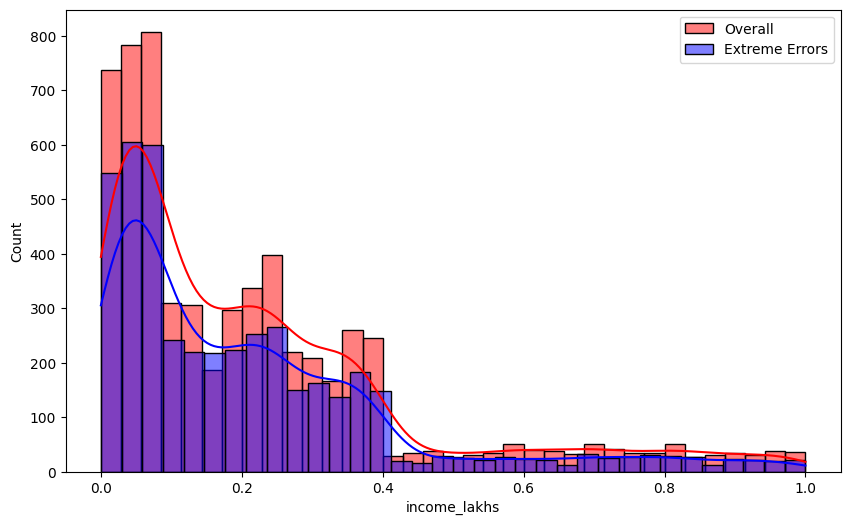

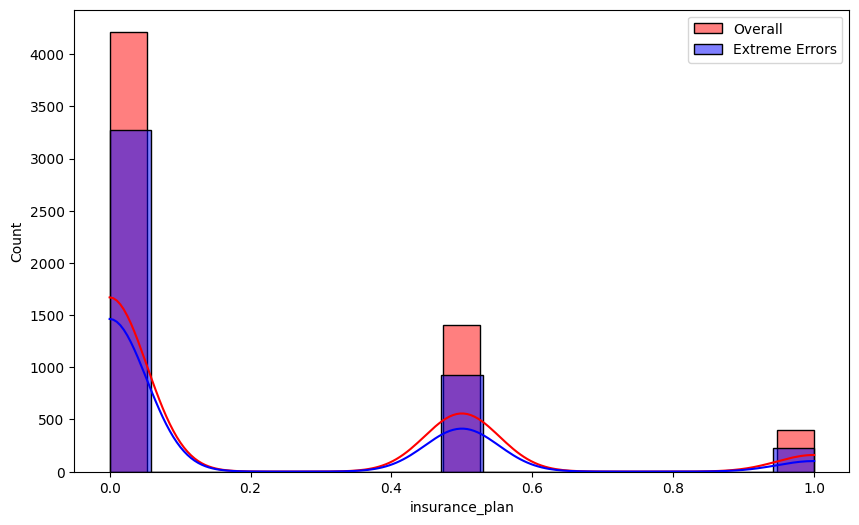

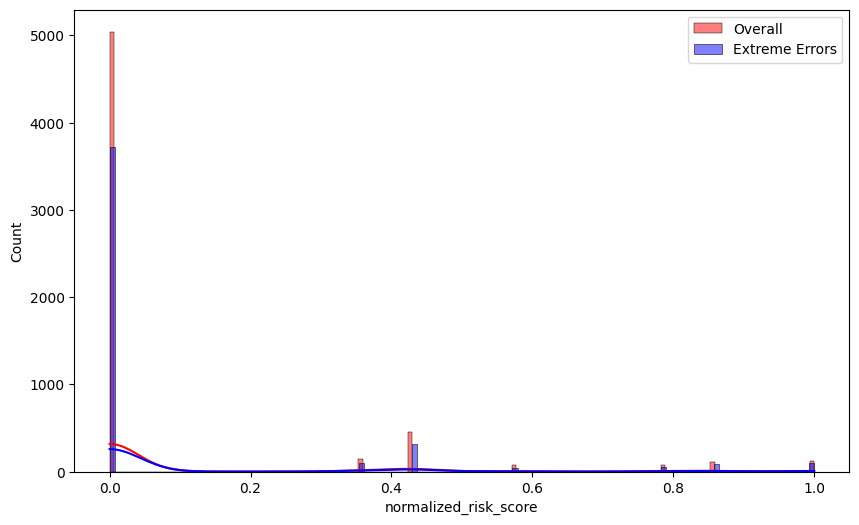

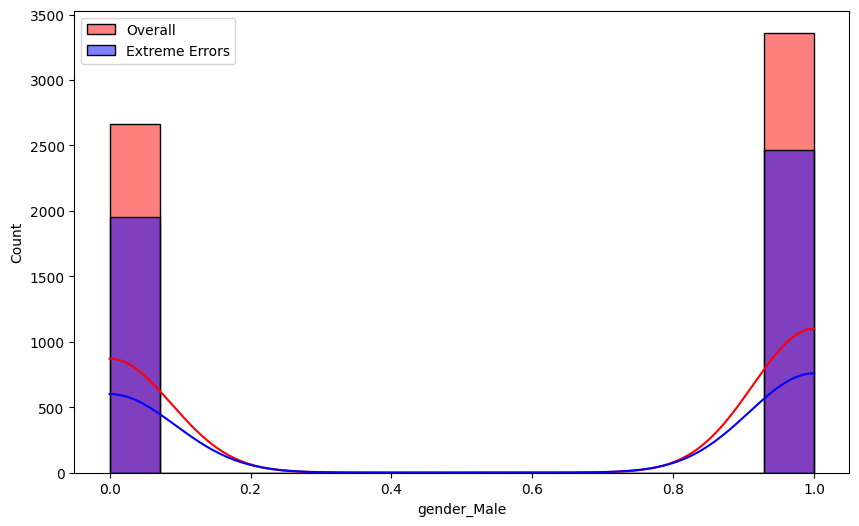

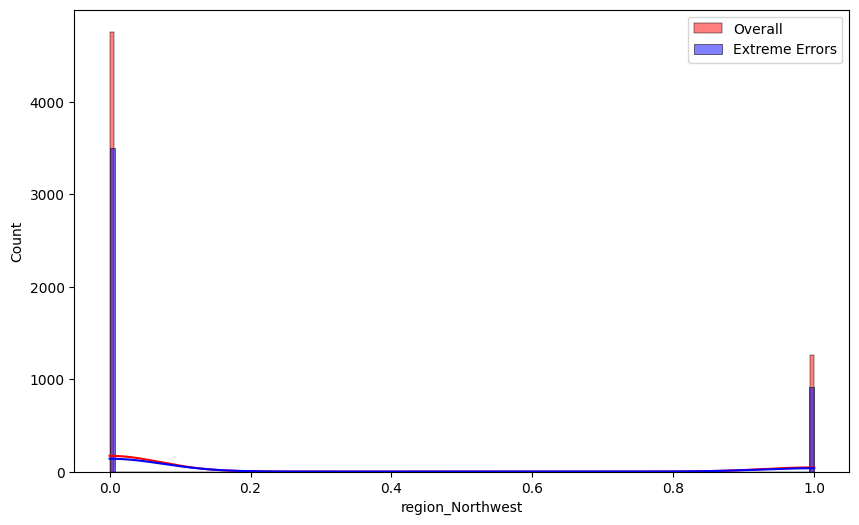

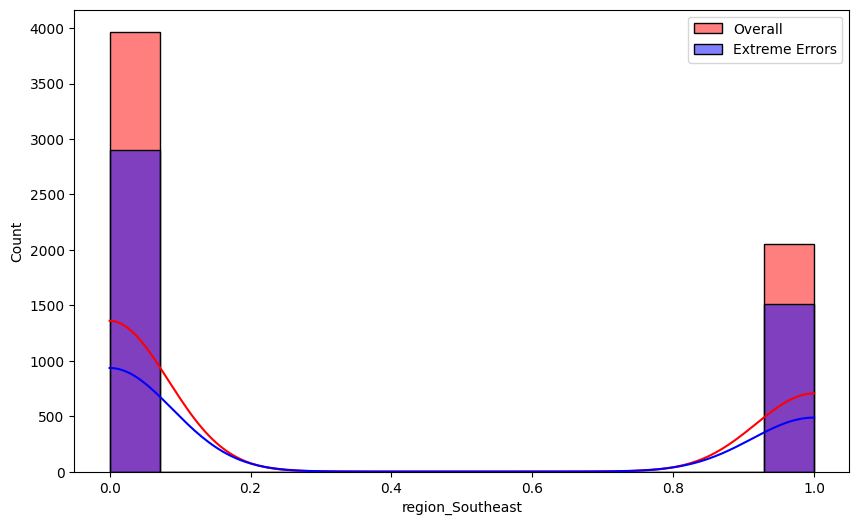

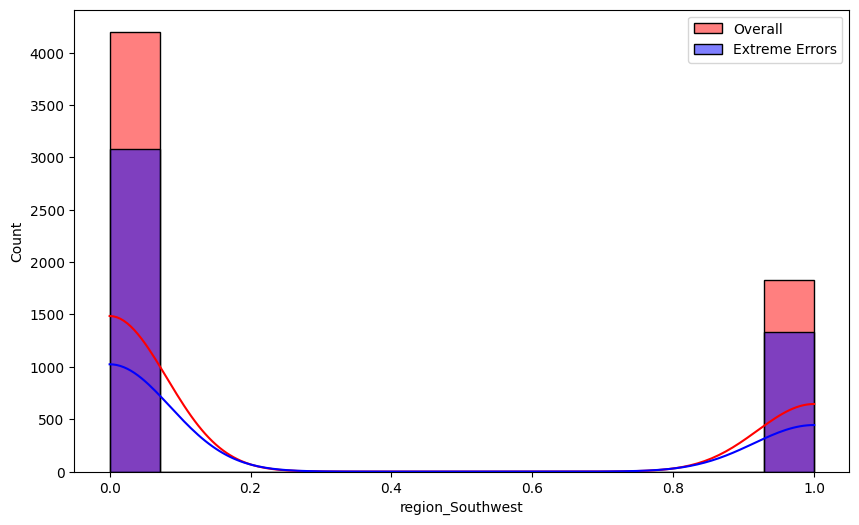

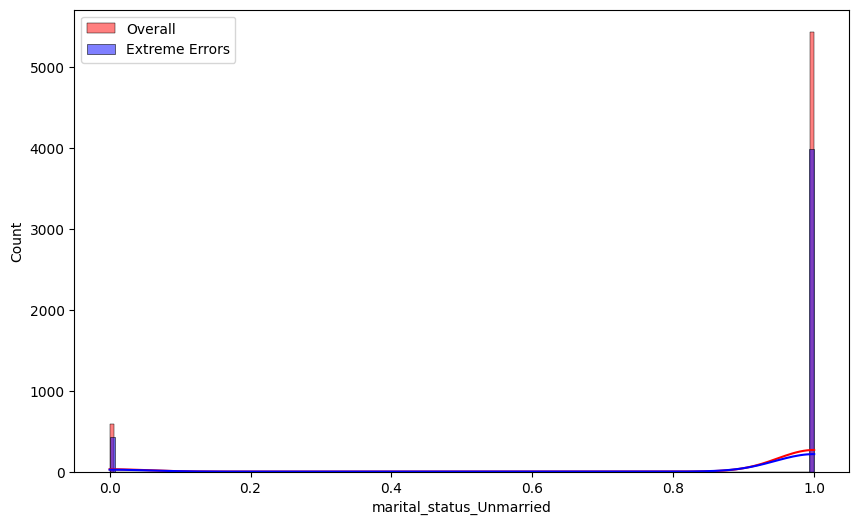

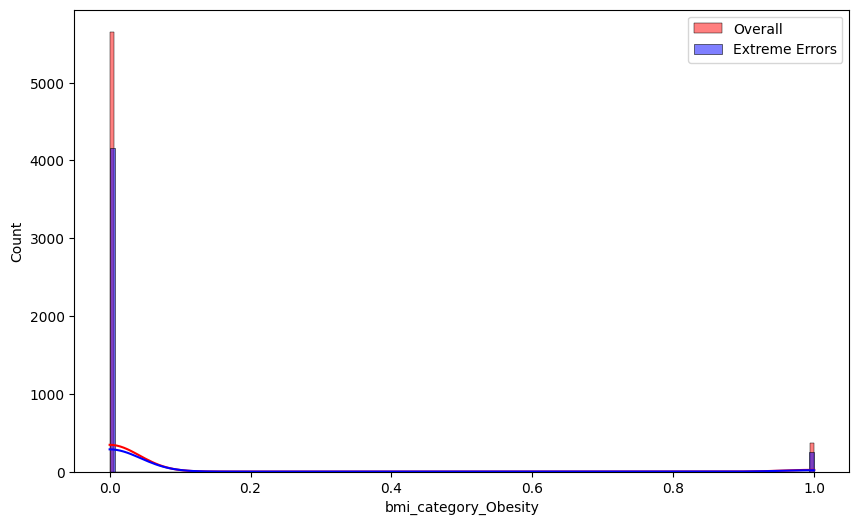

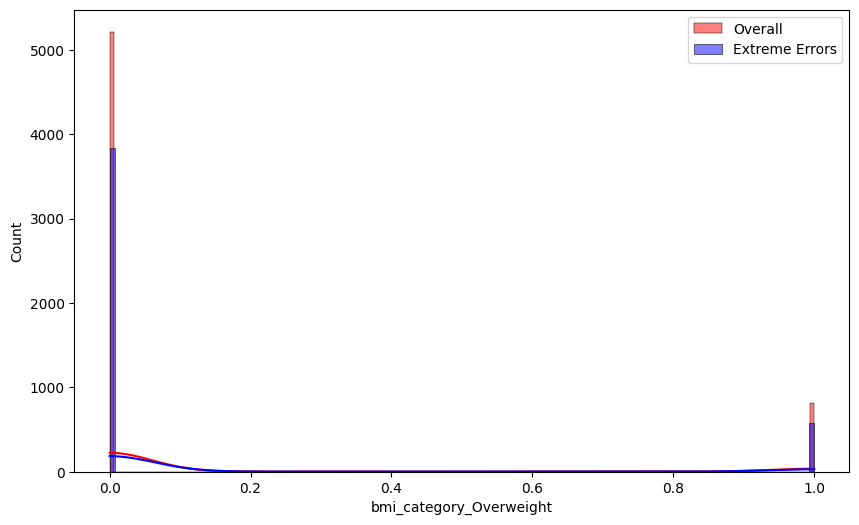

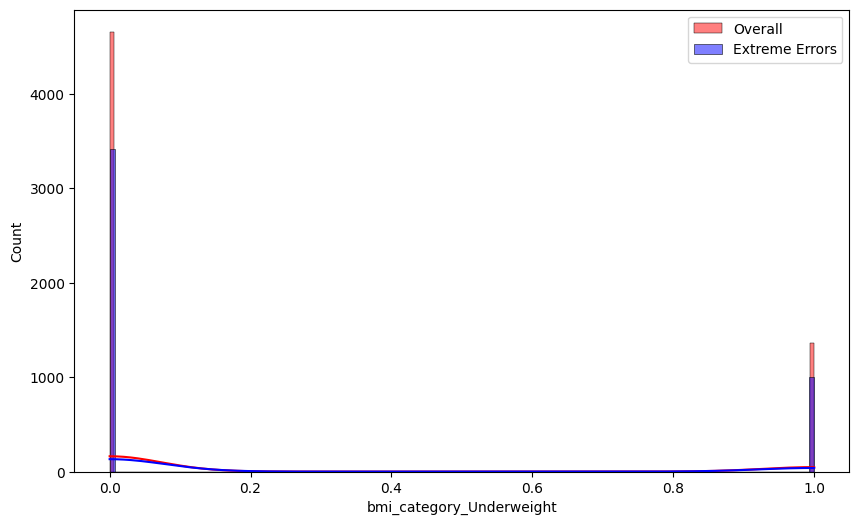

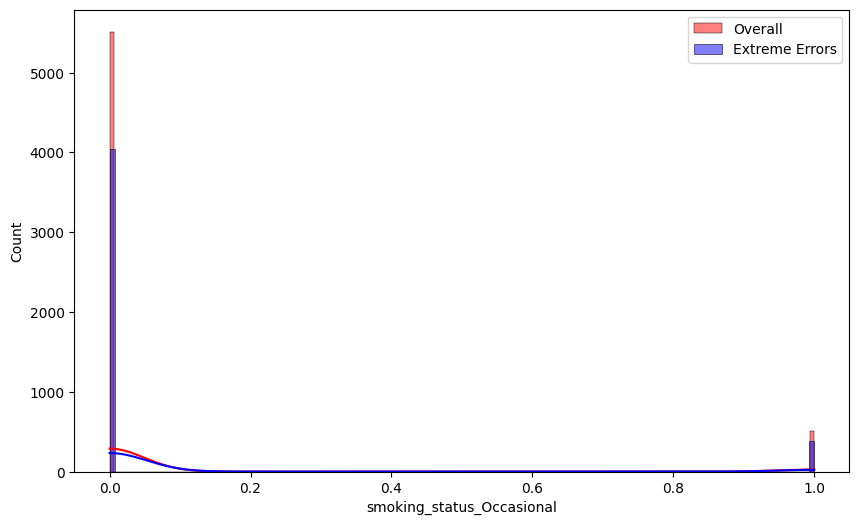

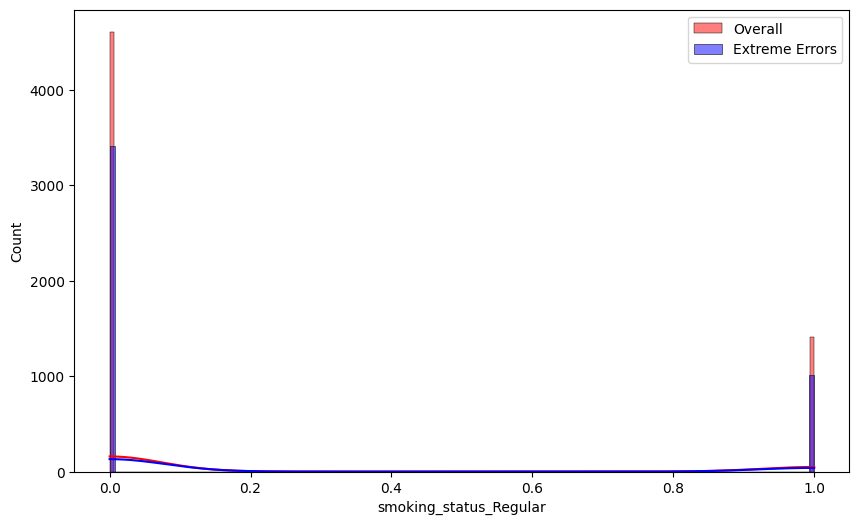

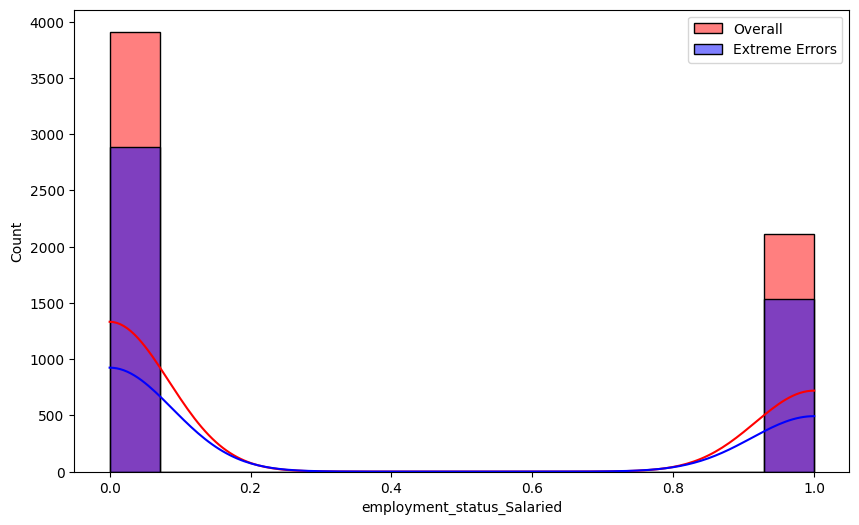

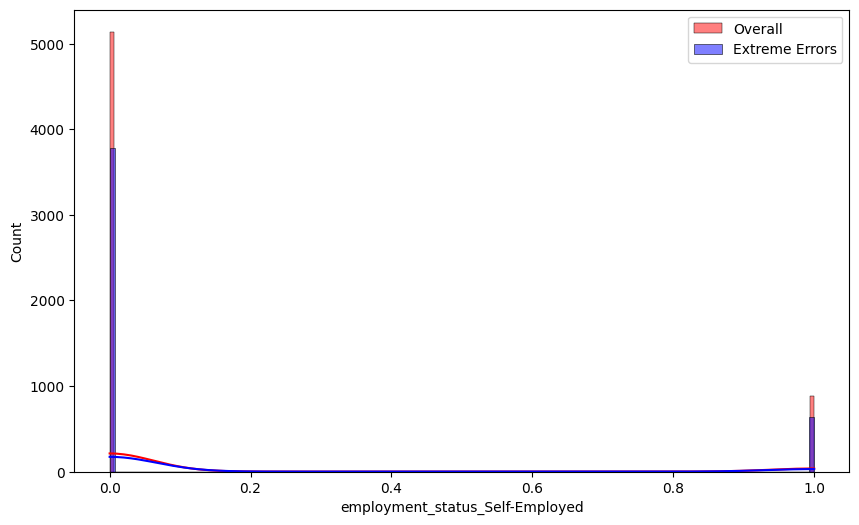

In [69]:
for feature in X.columns:
    if feature in X_test.columns:
        plt.figure(figsize=(10,6))
        sns.histplot(X_test[feature], color='red', label='Overall', kde=True)
        sns.histplot(extreme_errors_df[feature], color='blue', alpha=0.5, label='Extreme Errors', kde=True)
        plt.legend()
    else:
        print(f"Skipping missing feature: {feature}")


In [70]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan']

In [71]:
extreme_errors_df['income_level']= -1

<Axes: xlabel='age', ylabel='Count'>

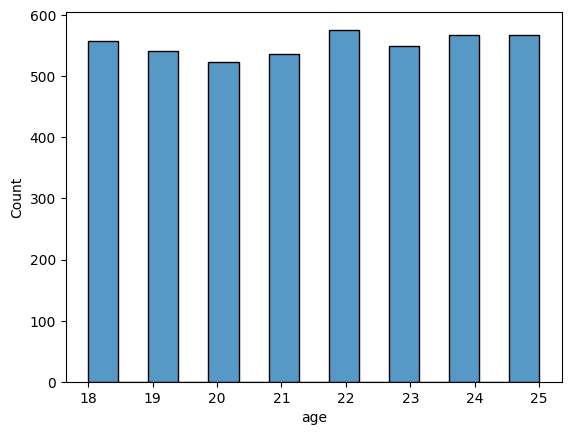

In [72]:
df_reversed=pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])

sns.histplot(df_reversed['age'])

In [73]:
extreme_error_pct

73.33222701626286